In [11]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
import scipy.cluster.hierarchy  as shc
import matplotlib.pyplot as plt

In [2]:
first = pd.read_pickle('dataset/first_session.pickle')
user = pd.read_pickle('dataset/user_profile.pickle')
engage = pd.read_pickle('dataset/user_engagement.pickle')

In [3]:
first['session_start_timestamp'] = pd.to_datetime(first['session_start_timestamp'])
first['user_signup_timestamp']   = pd.to_datetime(first['user_signup_timestamp'])
first['action_timestamp']        = pd.to_datetime(first['action_timestamp'])

In [4]:
first_ = first.head(100000).copy()
user_ = user.head(100000).copy()
engage = engage.head(100000).copy()

In [5]:
first_['action_min'] = ((first_['action_timestamp'] - first_['session_start_timestamp'])
                       .apply(lambda x:  x.total_seconds() / 60))

In [32]:
Z = linkage(X, 'ward')

CPU times: user 313 ms, sys: 41.2 ms, total: 354 ms
Wall time: 275 ms


In [33]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.768339845541732

In [27]:
first_hier = (first_[['user_id', 'action_min', 'session_id', 
                      'action_type', 'page_name', 'offer_lender', 'offer_product', 
                      'offer_page_position', 'offer_card_id']]
              .set_index(['user_id', 'session_id']))
first_hier = (pd.get_dummies(first_hier, columns=['action_type', 'page_name', 'offer_lender', 
                                    'offer_card_id', 'offer_product', 'offer_page_position'])
             .drop(['action_min'], 1)
             .head(10000))

In [20]:
%%time


CPU times: user 150 ms, sys: 33.5 ms, total: 184 ms
Wall time: 198 ms


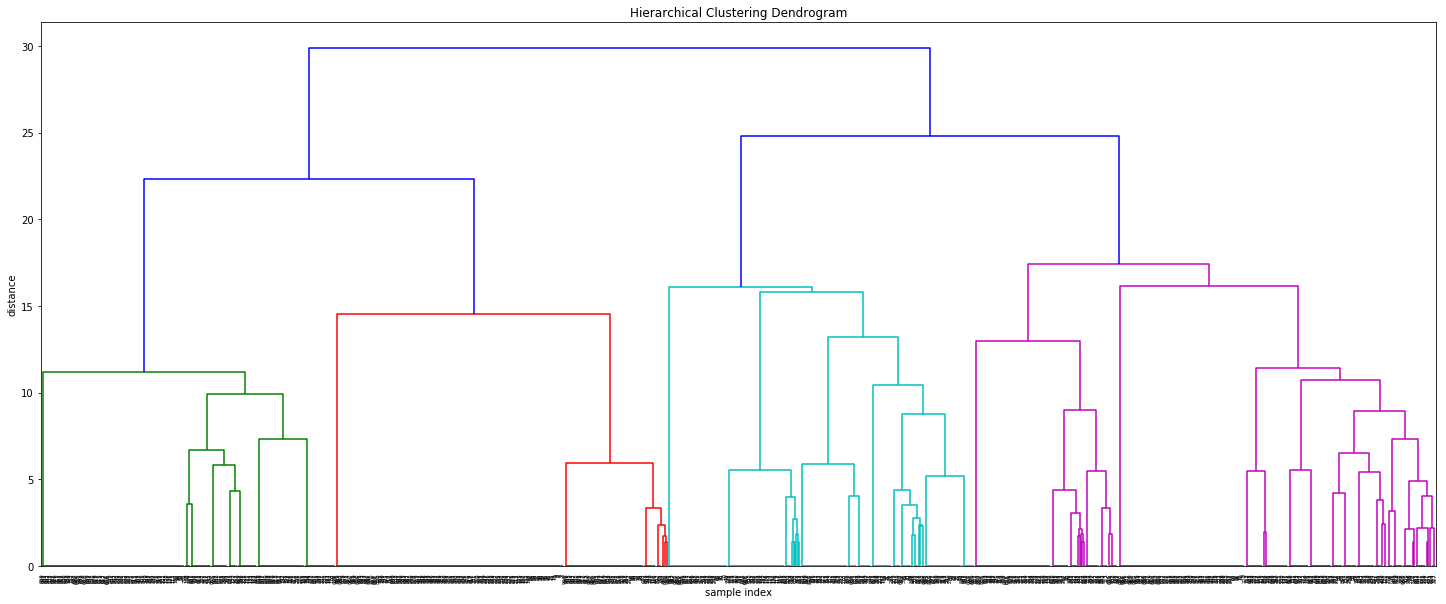

In [80]:
import matplotlib.pyplot as plt
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    #leaf_rotation=90.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## PCA

[0.1858  0.14759]
CPU times: user 29.3 s, sys: 4.39 s, total: 33.7 s
Wall time: 23 s


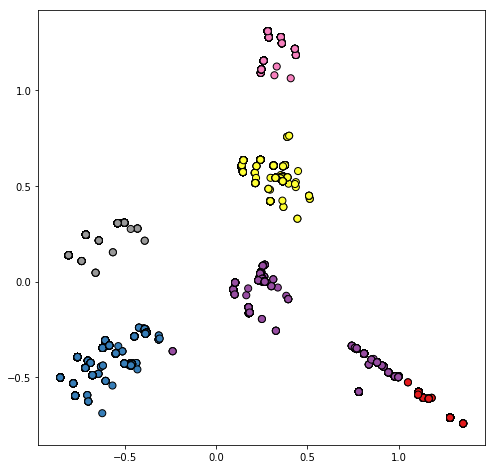

In [28]:
%%time

plt.figure(figsize=(8, 8))
pca = PCA(n_components=2)

X = first_hier.values
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

clustering = SpectralClustering(n_clusters=6)
labels = clustering.fit_predict(X_pca)

X_pca = np.concatenate((X_pca, labels.reshape((10000,1))), axis=1)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = X_pca[:, 2], cmap=plt.cm.Set1,
            edgecolor='k', s = 50)

In [46]:
first_hier_cluster = pd.concat([first_hier.reset_index(), pd.Series(labels).rename('cluster')], 1)
first_cluster = pd.concat([first_.reset_index(), pd.Series(labels).rename('cluster')], 1)
first_cluster.groupby('cluster').offer_page_position.value_counts(normalize=True)

cluster  offer_page_position        
0.0      HOME                           0.563235
         BAD_PAYMENT_HISTORY            0.435294
         ACCESS_CREDIT_PERSONAL_LOAN    0.001471
1.0      CREDIT_FOUNDATION              0.424991
         CREDIT_USAGE                   0.363967
         NEW_CARD_SCORE_INCREASE        0.096985
         NEW_CC_-_SCORE_OVER_TIME       0.065383
         BALANCE_TRANSFER               0.046495
         REWARDS                        0.002179
2.0      CREDIT_USAGE                   0.369650
         BANKING                        0.129961
         ACCESS_CREDIT_PERSONAL_LOAN    0.127626
         FEATURED_AD                    0.106615
         CREDIT_ AGE                    0.086381
         CREDIT_FOUNDATION              0.084047
         NEW_CARD_SCORE_INCREASE        0.049805
         BALANCE_TRANSFER               0.031128
         REWARDS                        0.008560
         TOP                            0.006226
3.0      HIGHER_CREDIT_LIMIT    

In [51]:
%%time

cluster = AgglomerativeClustering()
cluster.fit_predict(X)

CPU times: user 101 ms, sys: 5.18 ms, total: 106 ms
Wall time: 117 ms


NameError: name 'dendogram' is not defined

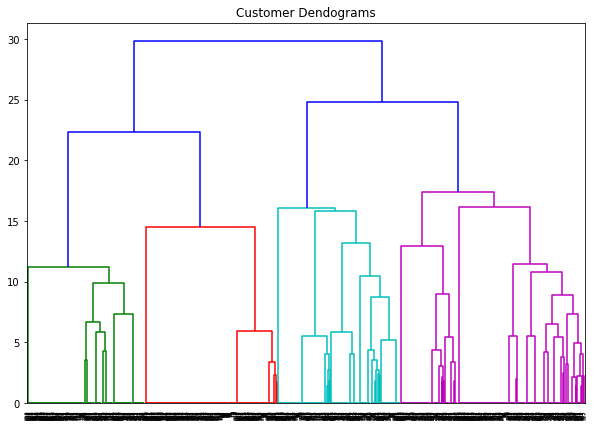

In [57]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  
dendogram(dend)

In [65]:
shc.cut_tree(Z, n_clusters=[5,10])

array([[0, 0],
       [1, 1],
       [2, 2],
       ...,
       [0, 5],
       [0, 5],
       [2, 7]])

In [79]:
shc.fcluster(Z, t = 0.5*Z.max())

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,